<a href="https://colab.research.google.com/github/BirukovAlex/neto_Python/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%C2%AB%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9%C2%BB_%D0%BE%D0%B1%D0%BD%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание**

*Цель:* изучить применение дерева решений в рамках задачи регрессии

*Описание задания:* В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets.

*Целевая переменная* – MedHouseVal.

Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

На полученных данных построить модель регрессии и дерево решений

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

2. Проведите первичный анализ.

 a.Проверьте данные на пропуски. Удалите в случае обнаружения.

 b.*Нормализуйте один из признаков.

3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

4. Обучите модель регрессии на обучающем множестве.

5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

6. Обучите дерево решений на обучающем множестве.

 a. Повторите п. 5 для полученной модели.

 b. Визуализируйте часть дерева решений.

*Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.*

7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.

 a. Повторите п. 5 для полученной модели.
8. Сформулируйте выводы по проделанной работе.

 a. Сравните точность двух моделей.

 b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

*Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score

In [3]:
# 1. Загрузка данных
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target  # MedHouseVal - целевая переменная

In [4]:
# 2. Проверка на пропуски
print("Пропуски в данных:", X.isnull().sum().sum())  # Проверяем наличие пропусков

Пропуски в данных: 0


In [7]:
# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 4. Обучение линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [8]:
# 5. Оценка точности линейной регрессии
lin_reg_score = lin_reg.score(X_test, y_test)
print(f"Точность линейной регрессии: {lin_reg_score:.4f}")

Точность линейной регрессии: 0.5758


In [9]:
# 6. Обучение дерева решений (начальная модель)
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [10]:
# 7. Оценка точности дерева решений
tree_reg_score = tree_reg.score(X_test, y_test)
print(f"Точность дерева решений (без оптимизации): {tree_reg_score:.4f}")

Точность дерева решений (без оптимизации): 0.6221


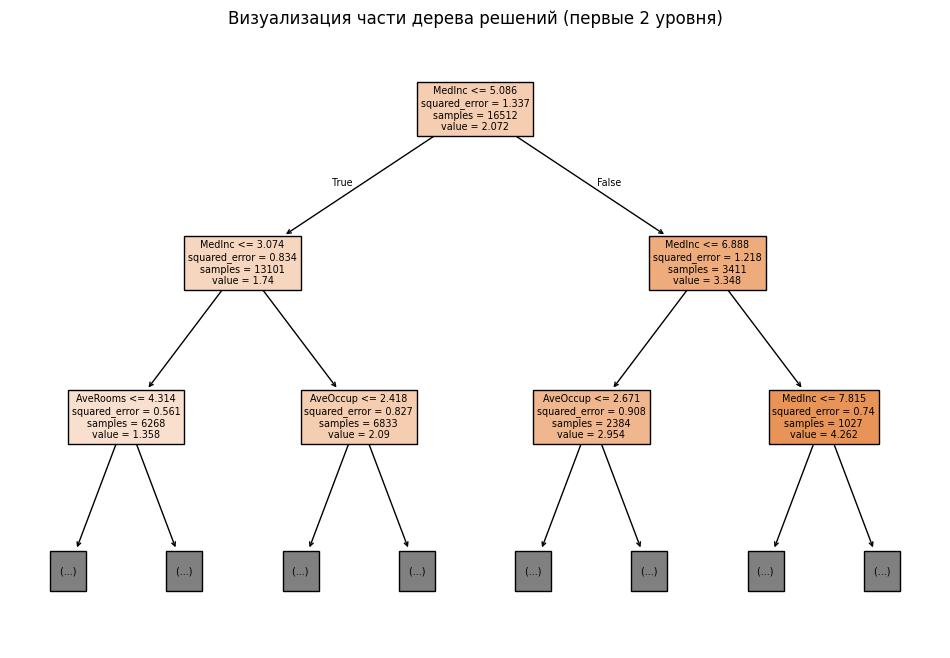

In [11]:
# 8. Визуализация части дерева решений
plt.figure(figsize=(12, 8))
plot_tree(tree_reg, max_depth=2, feature_names=X.columns, filled=True)
plt.title("Визуализация части дерева решений (первые 2 уровня)")
plt.show()

In [12]:
# 9. Оптимизация глубины дерева
best_score = 0
best_depth = 0
for depth in range(1, 20):
    current_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    current_tree.fit(X_train, y_train)
    current_score = current_tree.score(X_test, y_test)
    if current_score > best_score:
        best_score = current_score
        best_depth = depth

print(f"Оптимальная глубина дерева: {best_depth}")
print(f"Точность оптимизированного дерева решений: {best_score:.4f}")

Оптимальная глубина дерева: 9
Точность оптимизированного дерева решений: 0.6833


In [13]:
# 10. Сравнение точности всех моделей
print("\nСравнение точности моделей:")
print(f"1. Линейная регрессия: {lin_reg_score:.4f}")
print(f"2. Дерево решений (без оптимизации): {tree_reg_score:.4f}")
print(f"3. Оптимизированное дерево решений (глубина={best_depth}): {best_score:.4f}")


Сравнение точности моделей:
1. Линейная регрессия: 0.5758
2. Дерево решений (без оптимизации): 0.6221
3. Оптимизированное дерево решений (глубина=9): 0.6833


Оптимизированное дерево решений показывает наилучшую точность среди трех моделей.

Линейная регрессия показывает худший результат, что может говорить о нелинейной зависимости целевой переменной от признаков.

Дерево решений без ограничения глубины склонно к переобучению, поэтому его точность на тестовых данных может быть ниже, чем у оптимизированного варианта

Точность для всех трёх вариантов совсем невысокая, возможно лучше использовать деревья для задач классификации?